<a href="https://colab.research.google.com/github/carolineb3/US-FlightDelayModeling/blob/main/Classification_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Essential imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# XGBoost
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base = "/content/drive/MyDrive/MIS 545 Project/"

X_train = pd.read_csv(base + "X_train_clf.csv")
X_test  = pd.read_csv(base + "X_test_clf.csv")

y_train = pd.read_csv(base + "y_train_clf.csv").iloc[:, 0]
y_test  = pd.read_csv(base + "y_test_clf.csv").iloc[:, 0]

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)



Shapes: (779928, 18) (361972, 18) (779928,) (361972,)


In [ ]:
numeric_features = [
    'CRS_DEP_TIME',
    'CRS_ELAPSED_TIME',
    'DISTANCE',
    'MONTH',
    'DAY_OF_WEEK',
    'HOUR',
    'ORIGIN_FREQ',
    'DEST_FREQ'
]
categorical_features = [
    'OP_UNIQUE_CARRIER',
    'DEP_TIME_BLK'
]

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
    )

In [ ]:
# head / dtypes / target balance
display(X_train.head())
print(X_train.dtypes)
print("Target distribution (train):")
print(y_train.value_counts())


,YEAR,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,HOUR,ORIGIN_FREQ,DEST_FREQ
0,2025,7,7,UA,11292,14122,1759,1700-1759,2306,31.0,2300-2359,0.0,0.0,187.0,1290.0,17,83291,11288
1,2025,7,6,NK,11298,12892,545,0001-0559,705,0.0,0700-0759,0.0,0.0,200.0,1235.0,5,81441,49824
2,2025,6,2,DL,12953,10721,859,0800-0859,1017,0.0,1000-1059,0.0,0.0,78.0,184.0,8,32356,36999
3,2025,5,7,DL,11423,10397,1126,1100-1159,1435,40.0,1400-1459,0.0,0.0,129.0,743.0,11,3824,81930
4,2025,7,2,OO,11865,11292,1413,1400-1459,1545,0.0,1500-1559,0.0,0.0,92.0,313.0,14,183,82815


YEAR                   int64
MONTH                  int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
ORIGIN_AIRPORT_ID      int64
DEST_AIRPORT_ID        int64
CRS_DEP_TIME           int64
DEP_TIME_BLK          object
CRS_ARR_TIME           int64
ARR_DELAY_NEW        float64
ARR_TIME_BLK          object
CANCELLED            float64
DIVERTED             float64
CRS_ELAPSED_TIME     float64
DISTANCE             float64
HOUR                   int64
ORIGIN_FREQ            int64
DEST_FREQ              int64
dtype: object
Target distribution (train):
ARR_DEL15
1.0    389964
0.0    389964
Name: count, dtype: int64


Building Baseline Models: Logisitic Regression Baseline Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg_model.fit(X_train, y_train)
log_reg_preds = log_reg_model.predict(X_test)


In [ ]:
# Logistic regression performance
print(classification_report(y_test, log_reg_preds))
print("AUC:", roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_preds))

              precision    recall  f1-score   support

         0.0       0.84      0.58      0.69    264481
         1.0       0.38      0.69      0.49     97491

    accuracy                           0.61    361972
   macro avg       0.61      0.64      0.59    361972
weighted avg       0.71      0.61      0.64    361972

AUC: 0.684709128308075
Confusion Matrix:
 [[154607 109874]
 [ 30028  67463]]


Building Baseline Models: Decision Tree Classifier Baseline Model




In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=37))
])

tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)


In [ ]:
# Decision tree performance
print(classification_report(y_test, tree_preds))
print("AUC:", roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))

              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71    264481
         1.0       0.36      0.53      0.42     97491

    accuracy                           0.62    361972
   macro avg       0.57      0.59      0.57    361972
weighted avg       0.67      0.62      0.63    361972

AUC: 0.6060554625422891
Confusion Matrix:
 [[171843  92638]
 [ 46222  51269]]


Ensemble Model: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=37,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

# ROC-AUC
rf_probs = rf_model.predict_proba(X_test)[:,1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_probs))


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.61      0.70    264481
         1.0       0.37      0.62      0.46     97491

    accuracy                           0.61    361972
   macro avg       0.59      0.62      0.58    361972
weighted avg       0.69      0.61      0.64    361972

Random Forest Confusion Matrix:
[[161780 102701]
 [ 36999  60492]]
Random Forest ROC-AUC: 0.6572732539107199


Random Forest Hyperparameter Tuning


In [ ]:
#Sampling for Hyperparameter Tuning
X_sample = X_train.sample(10000, random_state=42)
y_sample = y_train.loc[X_sample.index]


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20, None]
}

rf_gs = GridSearchCV(
    rf_model,
    rf_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1
)

rf_gs.fit(X_sample, y_sample)

print("Best RF Params:", rf_gs.best_params_)
print("Best RF Score:", rf_gs.best_score_)


In [ ]:
#Fitting full model to the sampled tuned set
best_rf_model = rf_gs.best_estimator_
best_rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CRS_DEP_TIME',
                                                   'CRS_ELAPSED_TIME',
                                                   'DISTANCE', 'MONTH',
                                                   'DAY_OF_WEEK', 'HOUR',
                                                   'ORIGIN_FREQ',
                                                   'DEST_FREQ']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['OP_UNIQUE_CARRIER',
                                                   'DEP_TIME_BLK'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        n_jobs=-1, random_state=37))])

Testing Random Forest Tuned Model and Producing Metrics:
Precision, recall, F1 score, ROC-AUC,
Confusion matrix


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions from the tuned Random Forest
rf_preds_tuned = best_rf_model.predict(X_test)

print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, rf_preds_tuned))

print("Tuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds_tuned))

# ROC-AUC
rf_probs_tuned = best_rf_model.predict_proba(X_test)[:,1]
print("Tuned Random Forest ROC-AUC:", roc_auc_score(y_test, rf_probs_tuned))


Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.59      0.69    264481
         1.0       0.39      0.70      0.50     97491

    accuracy                           0.62    361972
   macro avg       0.61      0.64      0.60    361972
weighted avg       0.72      0.62      0.64    361972

Tuned Random Forest Confusion Matrix:
[[156575 107906]
 [ 29629  67862]]
Tuned Random Forest ROC-AUC: 0.6981474121899119


Ensemble Model: XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=37,
        n_jobs=-1
    ))
])



In [ ]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:54:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))

# ROC-AUC
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_probs))


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74    264481
         1.0       0.42      0.68      0.52     97491

    accuracy                           0.66    361972
   macro avg       0.64      0.67      0.63    361972
weighted avg       0.73      0.66      0.68    361972

XGBoost Confusion Matrix:
[[173594  90887]
 [ 31056  66435]]
XGBoost ROC-AUC: 0.7268283778870996


XGBoost Hyperparameter Tuning

In [ ]:
#Sampling for Hyperparameter Tuning
X_sample = X_train.sample(10000, random_state=42)
y_sample = y_train.loc[X_sample.index]


In [ ]:
xgb_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1],
    'model__colsample_bytree': [0.8, 1]
}

xgb_gs = GridSearchCV(
    xgb_model,
    xgb_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

xgb_gs.fit(X_sample, y_sample)

print("Best XGB Params:", xgb_gs.best_params_)
print("Best XGB Score:", xgb_gs.best_score_)



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:55:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 1}
Best XGB Score: 0.6565969512076825


Testing XGBoost Tuned Model and Producing Metrics: Precision, recall, F1 score, ROC-AUC, Confusion matrix

In [ ]:
#Fitting full model to the sampled tuned set
best_xgb_model = xgb_gs.best_estimator_
best_xgb_model.fit(X_train, y_train)
xgb_preds = best_xgb_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:55:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

print("Tuned XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))

xgb_probs = best_xgb_model.predict_proba(X_test)[:,1]
print("Tuned XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_probs))


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.60      0.70    264481
         1.0       0.39      0.69      0.50     97491

    accuracy                           0.62    361972
   macro avg       0.61      0.64      0.60    361972
weighted avg       0.72      0.62      0.64    361972

Tuned XGBoost Confusion Matrix:
[[158042 106439]
 [ 30076  67415]]
Tuned XGBoost ROC-AUC: 0.6964508790064557


Creation of ROC Curve Plots for both Random Forest and XGBoost

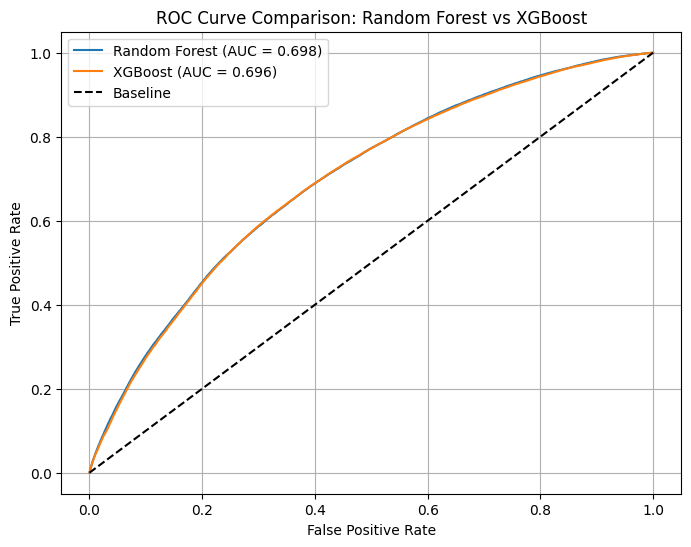

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
xgb_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve points
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute AUC values
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.3f})")

# Diagonal baseline
plt.plot([0,1], [0,1], 'k--', label="Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Random Forest vs XGBoost")
plt.legend()
plt.grid(True)
plt.show()


Creation of Confusion Matrix for both XGBoost and Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Random Forest tuned predictions
rf_preds_tuned = best_rf_model.predict(X_test)

print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, rf_preds_tuned))

print("Tuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds_tuned))


Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.59      0.69    264481
         1.0       0.39      0.70      0.50     97491

    accuracy                           0.62    361972
   macro avg       0.61      0.64      0.60    361972
weighted avg       0.72      0.62      0.64    361972

Tuned Random Forest Confusion Matrix:
[[156575 107906]
 [ 29629  67862]]


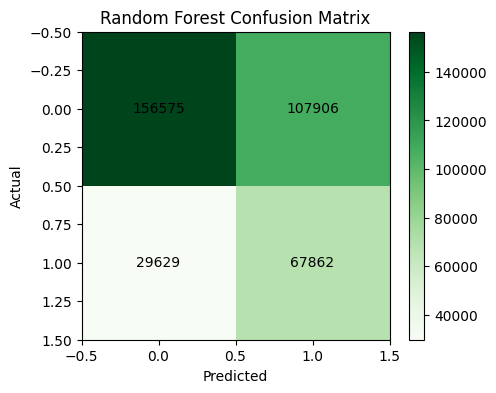

In [ ]:
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, rf_preds_tuned)

plt.figure(figsize=(5,4))
plt.imshow(cm_rf, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i, j], ha='center', va='center')
plt.show()


In [ ]:
# XGBoost tuned predictions
xgb_preds = best_xgb_model.predict(X_test)

print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

print("Tuned XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))


Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.60      0.70    264481
         1.0       0.39      0.69      0.50     97491

    accuracy                           0.62    361972
   macro avg       0.61      0.64      0.60    361972
weighted avg       0.72      0.62      0.64    361972

Tuned XGBoost Confusion Matrix:
[[158042 106439]
 [ 30076  67415]]


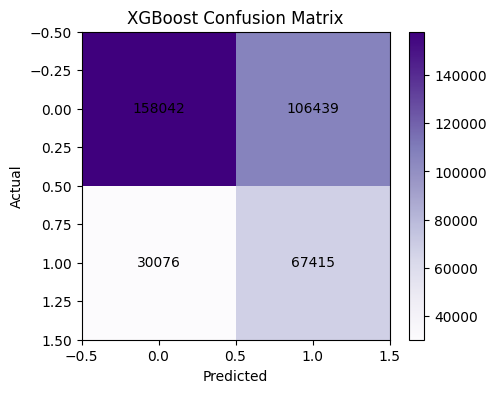

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_preds)

plt.figure(figsize=(5,4))
plt.imshow(cm_xgb, cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm_xgb.shape[0]):
    for j in range(cm_xgb.shape[1]):
        plt.text(j, i, cm_xgb[i, j], ha='center', va='center')
plt.show()
